array([<AxesSubplot:ylabel='Ch. 0'>, <AxesSubplot:ylabel='Ch. 1'>,
       <AxesSubplot:ylabel='Ch. 2'>, <AxesSubplot:ylabel='Ch. 3'>,
       <AxesSubplot:ylabel='Ch. 4'>, <AxesSubplot:ylabel='Ch. 5'>,
       <AxesSubplot:xlabel='Freq. (Hz)', ylabel='Ch. 6'>], dtype=object)

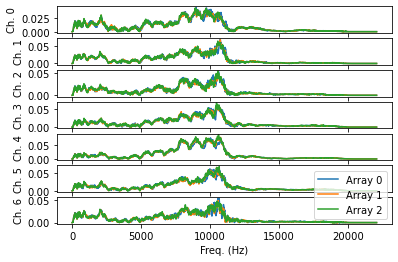

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib notebook
from scipy.fft import rfft, rfftfreq

SAMPLE_RATE = 44100

path_0 = "recorded/newRir34/RIR.npy"
path_1 = "recorded/newRir35/RIR.npy"
path_2 = "recorded/newRir36/RIR.npy"

def plot_rir(path):
    rir = np.load(path)
    fig, axs = plt.subplots(nrows=2)
    axs[0].plot(rir)
    axs[0].set_title("Impulse responses")

    transfer_func = rfft(rir, axis=0)
    xf = rfftfreq(rir.shape[0], 1 / SAMPLE_RATE)
    axs[1].plot(xf, np.abs(transfer_func))
    axs[1].set_title("Transfer functions")
    plt.tight_layout()

    
def compare_rirs(paths):
    rirs = [np.load(path) for path in paths]
    
    if rirs[0].shape != rirs[1].shape:
        raise ValueError("The impulse responses must have same size")
    num_samples, num_channels = rirs[0].shape
    
    transfer_funcs = [rfft(rir, axis=0) for rir in rirs]
    xf = rfftfreq(num_samples, 1 / SAMPLE_RATE)
    
    fig, axs = plt.subplots(nrows=num_channels)
    for i in range(num_channels):
        for j, transfer_func in enumerate(transfer_funcs): 
            axs[i].plot(xf, np.abs(transfer_func[:, i]), label=f"Array {j}")
        axs[i].set_ylabel(f"Ch. {i}")
    axs[-1].legend()
    axs[-1].set_xlabel("Freq. (Hz)")
    
    return axs

compare_rirs([path_0, path_1, path_2])
#plt.tight_layout()
# plot_rir(path_0)
# plot_rir(path_1)
# plot_rir(path_2)
#plot_rir(path_3)